In [ ]:
# Part A : Question 5 ---- Completed

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers, optimizers
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from time import time

In [2]:
NUM_CLASSES = 3

epochs = 1000
seed = 10
batch_size = 32
num_neurons = 10

np.random.seed(seed)
tf.random.set_seed(seed)

In [3]:
# scale data
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
#read train data
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')
X, y = train_input[1:, :21], train_input[1:,-1].astype(int)
X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
y = y-1

# Split data into 70:30 ratio for training and testing
trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.3, random_state=1)
print(trainX.shape, testX.shape, trainY.shape, testY.shape)

(1488, 21) (638, 21) (1488,) (638,)


In [5]:
histories = {}
opt = keras.optimizers.SGD(learning_rate=0.01)
reg = regularizers.l2(10e-6)
epochs = 1000


model = keras.Sequential([keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                          keras.layers.Dense(num_neurons, kernel_regularizer=reg, activation='relu'),
                          keras.layers.Dense(NUM_CLASSES, activation='softmax')])

model.compile(optimizer=opt, loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

histories['4_layer'] = model.fit(trainX, trainY, epochs=epochs,
                                 validation_data=(testX, testY),
                                 verbose=2, batch_size=batch_size)
                         

Epoch 1/1000
47/47 - 0s - loss: 1.0388 - accuracy: 0.4825 - val_loss: 0.9182 - val_accuracy: 0.7790
Epoch 2/1000
47/47 - 0s - loss: 0.8381 - accuracy: 0.7856 - val_loss: 0.7917 - val_accuracy: 0.7680
Epoch 3/1000
47/47 - 0s - loss: 0.7353 - accuracy: 0.7829 - val_loss: 0.7237 - val_accuracy: 0.7680
Epoch 4/1000
47/47 - 0s - loss: 0.6835 - accuracy: 0.7829 - val_loss: 0.6963 - val_accuracy: 0.7680
Epoch 5/1000
47/47 - 0s - loss: 0.6617 - accuracy: 0.7829 - val_loss: 0.6849 - val_accuracy: 0.7680
Epoch 6/1000
47/47 - 0s - loss: 0.6516 - accuracy: 0.7829 - val_loss: 0.6779 - val_accuracy: 0.7680
Epoch 7/1000
47/47 - 0s - loss: 0.6445 - accuracy: 0.7829 - val_loss: 0.6710 - val_accuracy: 0.7680
Epoch 8/1000
47/47 - 0s - loss: 0.6379 - accuracy: 0.7829 - val_loss: 0.6647 - val_accuracy: 0.7680
Epoch 9/1000
47/47 - 0s - loss: 0.6315 - accuracy: 0.7829 - val_loss: 0.6593 - val_accuracy: 0.7680
Epoch 10/1000
47/47 - 0s - loss: 0.6259 - accuracy: 0.7829 - val_loss: 0.6525 - val_accuracy: 0.7680

Epoch 83/1000
47/47 - 0s - loss: 0.2779 - accuracy: 0.8804 - val_loss: 0.2873 - val_accuracy: 0.8683
Epoch 84/1000
47/47 - 0s - loss: 0.2772 - accuracy: 0.8851 - val_loss: 0.2875 - val_accuracy: 0.8652
Epoch 85/1000
47/47 - 0s - loss: 0.2762 - accuracy: 0.8824 - val_loss: 0.2853 - val_accuracy: 0.8668
Epoch 86/1000
47/47 - 0s - loss: 0.2749 - accuracy: 0.8837 - val_loss: 0.2905 - val_accuracy: 0.8683
Epoch 87/1000
47/47 - 0s - loss: 0.2748 - accuracy: 0.8831 - val_loss: 0.2890 - val_accuracy: 0.8715
Epoch 88/1000
47/47 - 0s - loss: 0.2719 - accuracy: 0.8898 - val_loss: 0.2868 - val_accuracy: 0.8871
Epoch 89/1000
47/47 - 0s - loss: 0.2730 - accuracy: 0.8831 - val_loss: 0.2825 - val_accuracy: 0.8699
Epoch 90/1000
47/47 - 0s - loss: 0.2725 - accuracy: 0.8831 - val_loss: 0.2830 - val_accuracy: 0.8668
Epoch 91/1000
47/47 - 0s - loss: 0.2699 - accuracy: 0.8864 - val_loss: 0.2812 - val_accuracy: 0.8793
Epoch 92/1000
47/47 - 0s - loss: 0.2703 - accuracy: 0.8871 - val_loss: 0.2804 - val_accurac

Epoch 164/1000
47/47 - 0s - loss: 0.2327 - accuracy: 0.8999 - val_loss: 0.2598 - val_accuracy: 0.8966
Epoch 165/1000
47/47 - 0s - loss: 0.2323 - accuracy: 0.9012 - val_loss: 0.2592 - val_accuracy: 0.8934
Epoch 166/1000
47/47 - 0s - loss: 0.2318 - accuracy: 0.8958 - val_loss: 0.2565 - val_accuracy: 0.8950
Epoch 167/1000
47/47 - 0s - loss: 0.2314 - accuracy: 0.8985 - val_loss: 0.2572 - val_accuracy: 0.8981
Epoch 168/1000
47/47 - 0s - loss: 0.2317 - accuracy: 0.8992 - val_loss: 0.2570 - val_accuracy: 0.8997
Epoch 169/1000
47/47 - 0s - loss: 0.2316 - accuracy: 0.8958 - val_loss: 0.2565 - val_accuracy: 0.8950
Epoch 170/1000
47/47 - 0s - loss: 0.2301 - accuracy: 0.8999 - val_loss: 0.2616 - val_accuracy: 0.8918
Epoch 171/1000
47/47 - 0s - loss: 0.2297 - accuracy: 0.9005 - val_loss: 0.2752 - val_accuracy: 0.8840
Epoch 172/1000
47/47 - 0s - loss: 0.2310 - accuracy: 0.8978 - val_loss: 0.2598 - val_accuracy: 0.8934
Epoch 173/1000
47/47 - 0s - loss: 0.2301 - accuracy: 0.8999 - val_loss: 0.2561 - v

Epoch 245/1000
47/47 - 0s - loss: 0.2160 - accuracy: 0.9012 - val_loss: 0.2614 - val_accuracy: 0.8950
Epoch 246/1000
47/47 - 0s - loss: 0.2186 - accuracy: 0.8992 - val_loss: 0.2520 - val_accuracy: 0.8997
Epoch 247/1000
47/47 - 0s - loss: 0.2168 - accuracy: 0.9019 - val_loss: 0.2524 - val_accuracy: 0.8966
Epoch 248/1000
47/47 - 0s - loss: 0.2146 - accuracy: 0.9046 - val_loss: 0.2790 - val_accuracy: 0.8824
Epoch 249/1000
47/47 - 0s - loss: 0.2160 - accuracy: 0.9026 - val_loss: 0.2546 - val_accuracy: 0.8981
Epoch 250/1000
47/47 - 0s - loss: 0.2163 - accuracy: 0.9019 - val_loss: 0.2594 - val_accuracy: 0.9013
Epoch 251/1000
47/47 - 0s - loss: 0.2162 - accuracy: 0.9012 - val_loss: 0.2534 - val_accuracy: 0.9013
Epoch 252/1000
47/47 - 0s - loss: 0.2167 - accuracy: 0.9005 - val_loss: 0.2537 - val_accuracy: 0.9028
Epoch 253/1000
47/47 - 0s - loss: 0.2156 - accuracy: 0.8985 - val_loss: 0.2535 - val_accuracy: 0.9044
Epoch 254/1000
47/47 - 0s - loss: 0.2160 - accuracy: 0.9019 - val_loss: 0.2549 - v

Epoch 326/1000
47/47 - 0s - loss: 0.2047 - accuracy: 0.9086 - val_loss: 0.2565 - val_accuracy: 0.9060
Epoch 327/1000
47/47 - 0s - loss: 0.2079 - accuracy: 0.9046 - val_loss: 0.2500 - val_accuracy: 0.9013
Epoch 328/1000
47/47 - 0s - loss: 0.2071 - accuracy: 0.9066 - val_loss: 0.2509 - val_accuracy: 0.9013
Epoch 329/1000
47/47 - 0s - loss: 0.2048 - accuracy: 0.9073 - val_loss: 0.2707 - val_accuracy: 0.8903
Epoch 330/1000
47/47 - 0s - loss: 0.2068 - accuracy: 0.9113 - val_loss: 0.2534 - val_accuracy: 0.9075
Epoch 331/1000
47/47 - 0s - loss: 0.2065 - accuracy: 0.9106 - val_loss: 0.2505 - val_accuracy: 0.9044
Epoch 332/1000
47/47 - 0s - loss: 0.2060 - accuracy: 0.9039 - val_loss: 0.2513 - val_accuracy: 0.9060
Epoch 333/1000
47/47 - 0s - loss: 0.2060 - accuracy: 0.9099 - val_loss: 0.2506 - val_accuracy: 0.8997
Epoch 334/1000
47/47 - 0s - loss: 0.2072 - accuracy: 0.9019 - val_loss: 0.2575 - val_accuracy: 0.9028
Epoch 335/1000
47/47 - 0s - loss: 0.2076 - accuracy: 0.9039 - val_loss: 0.2499 - v

Epoch 407/1000
47/47 - 0s - loss: 0.1985 - accuracy: 0.9113 - val_loss: 0.2497 - val_accuracy: 0.9044
Epoch 408/1000
47/47 - 0s - loss: 0.1995 - accuracy: 0.9066 - val_loss: 0.2492 - val_accuracy: 0.9044
Epoch 409/1000
47/47 - 0s - loss: 0.1989 - accuracy: 0.9126 - val_loss: 0.2585 - val_accuracy: 0.9107
Epoch 410/1000
47/47 - 0s - loss: 0.1997 - accuracy: 0.9153 - val_loss: 0.2537 - val_accuracy: 0.9075
Epoch 411/1000
47/47 - 0s - loss: 0.1992 - accuracy: 0.9059 - val_loss: 0.2498 - val_accuracy: 0.9028
Epoch 412/1000
47/47 - 0s - loss: 0.1989 - accuracy: 0.9093 - val_loss: 0.2500 - val_accuracy: 0.9013
Epoch 413/1000
47/47 - 0s - loss: 0.1992 - accuracy: 0.9133 - val_loss: 0.2506 - val_accuracy: 0.9044
Epoch 414/1000
47/47 - 0s - loss: 0.1986 - accuracy: 0.9140 - val_loss: 0.2531 - val_accuracy: 0.9060
Epoch 415/1000
47/47 - 0s - loss: 0.1995 - accuracy: 0.9120 - val_loss: 0.2544 - val_accuracy: 0.8918
Epoch 416/1000
47/47 - 0s - loss: 0.2007 - accuracy: 0.9106 - val_loss: 0.2522 - v

Epoch 488/1000
47/47 - 0s - loss: 0.1958 - accuracy: 0.9147 - val_loss: 0.2578 - val_accuracy: 0.9075
Epoch 489/1000
47/47 - 0s - loss: 0.1957 - accuracy: 0.9126 - val_loss: 0.2481 - val_accuracy: 0.9107
Epoch 490/1000
47/47 - 0s - loss: 0.1942 - accuracy: 0.9140 - val_loss: 0.2519 - val_accuracy: 0.9028
Epoch 491/1000
47/47 - 0s - loss: 0.1947 - accuracy: 0.9133 - val_loss: 0.2549 - val_accuracy: 0.9075
Epoch 492/1000
47/47 - 0s - loss: 0.1925 - accuracy: 0.9194 - val_loss: 0.2517 - val_accuracy: 0.9044
Epoch 493/1000
47/47 - 0s - loss: 0.1925 - accuracy: 0.9200 - val_loss: 0.2484 - val_accuracy: 0.9044
Epoch 494/1000
47/47 - 0s - loss: 0.1938 - accuracy: 0.9153 - val_loss: 0.2497 - val_accuracy: 0.9075
Epoch 495/1000
47/47 - 0s - loss: 0.1939 - accuracy: 0.9093 - val_loss: 0.2489 - val_accuracy: 0.9075
Epoch 496/1000
47/47 - 0s - loss: 0.1946 - accuracy: 0.9153 - val_loss: 0.2669 - val_accuracy: 0.8997
Epoch 497/1000
47/47 - 0s - loss: 0.1921 - accuracy: 0.9126 - val_loss: 0.2506 - v

Epoch 569/1000
47/47 - 0s - loss: 0.1872 - accuracy: 0.9147 - val_loss: 0.2499 - val_accuracy: 0.9028
Epoch 570/1000
47/47 - 0s - loss: 0.1920 - accuracy: 0.9160 - val_loss: 0.2494 - val_accuracy: 0.9091
Epoch 571/1000
47/47 - 0s - loss: 0.1917 - accuracy: 0.9126 - val_loss: 0.2484 - val_accuracy: 0.9107
Epoch 572/1000
47/47 - 0s - loss: 0.1898 - accuracy: 0.9147 - val_loss: 0.2522 - val_accuracy: 0.9122
Epoch 573/1000
47/47 - 0s - loss: 0.1890 - accuracy: 0.9180 - val_loss: 0.2495 - val_accuracy: 0.9107
Epoch 574/1000
47/47 - 0s - loss: 0.1887 - accuracy: 0.9147 - val_loss: 0.2495 - val_accuracy: 0.9107
Epoch 575/1000
47/47 - 0s - loss: 0.1869 - accuracy: 0.9160 - val_loss: 0.2720 - val_accuracy: 0.8981
Epoch 576/1000
47/47 - 0s - loss: 0.1886 - accuracy: 0.9207 - val_loss: 0.2513 - val_accuracy: 0.9075
Epoch 577/1000
47/47 - 0s - loss: 0.1875 - accuracy: 0.9167 - val_loss: 0.2530 - val_accuracy: 0.8981
Epoch 578/1000
47/47 - 0s - loss: 0.1880 - accuracy: 0.9207 - val_loss: 0.2491 - v

Epoch 650/1000
47/47 - 0s - loss: 0.1836 - accuracy: 0.9200 - val_loss: 0.2589 - val_accuracy: 0.9028
Epoch 651/1000
47/47 - 0s - loss: 0.1843 - accuracy: 0.9207 - val_loss: 0.2470 - val_accuracy: 0.9028
Epoch 652/1000
47/47 - 0s - loss: 0.1833 - accuracy: 0.9214 - val_loss: 0.2610 - val_accuracy: 0.9013
Epoch 653/1000
47/47 - 0s - loss: 0.1836 - accuracy: 0.9207 - val_loss: 0.2498 - val_accuracy: 0.9075
Epoch 654/1000
47/47 - 0s - loss: 0.1828 - accuracy: 0.9194 - val_loss: 0.2594 - val_accuracy: 0.9028
Epoch 655/1000
47/47 - 0s - loss: 0.1849 - accuracy: 0.9187 - val_loss: 0.2513 - val_accuracy: 0.9075
Epoch 656/1000
47/47 - 0s - loss: 0.1817 - accuracy: 0.9207 - val_loss: 0.2486 - val_accuracy: 0.9091
Epoch 657/1000
47/47 - 0s - loss: 0.1821 - accuracy: 0.9153 - val_loss: 0.2741 - val_accuracy: 0.8997
Epoch 658/1000
47/47 - 0s - loss: 0.1835 - accuracy: 0.9180 - val_loss: 0.2469 - val_accuracy: 0.9107
Epoch 659/1000
47/47 - 0s - loss: 0.1838 - accuracy: 0.9187 - val_loss: 0.2527 - v

Epoch 731/1000
47/47 - 0s - loss: 0.1791 - accuracy: 0.9267 - val_loss: 0.2545 - val_accuracy: 0.9044
Epoch 732/1000
47/47 - 0s - loss: 0.1764 - accuracy: 0.9214 - val_loss: 0.2495 - val_accuracy: 0.9107
Epoch 733/1000
47/47 - 0s - loss: 0.1794 - accuracy: 0.9241 - val_loss: 0.2477 - val_accuracy: 0.9107
Epoch 734/1000
47/47 - 0s - loss: 0.1776 - accuracy: 0.9261 - val_loss: 0.2604 - val_accuracy: 0.9060
Epoch 735/1000
47/47 - 0s - loss: 0.1782 - accuracy: 0.9160 - val_loss: 0.2491 - val_accuracy: 0.9044
Epoch 736/1000
47/47 - 0s - loss: 0.1796 - accuracy: 0.9200 - val_loss: 0.2517 - val_accuracy: 0.9091
Epoch 737/1000
47/47 - 0s - loss: 0.1786 - accuracy: 0.9194 - val_loss: 0.2520 - val_accuracy: 0.9075
Epoch 738/1000
47/47 - 0s - loss: 0.1798 - accuracy: 0.9207 - val_loss: 0.2528 - val_accuracy: 0.9075
Epoch 739/1000
47/47 - 0s - loss: 0.1790 - accuracy: 0.9194 - val_loss: 0.2493 - val_accuracy: 0.9122
Epoch 740/1000
47/47 - 0s - loss: 0.1785 - accuracy: 0.9153 - val_loss: 0.2679 - v

Epoch 812/1000
47/47 - 0s - loss: 0.1741 - accuracy: 0.9234 - val_loss: 0.2515 - val_accuracy: 0.9075
Epoch 813/1000
47/47 - 0s - loss: 0.1738 - accuracy: 0.9214 - val_loss: 0.2526 - val_accuracy: 0.9060
Epoch 814/1000
47/47 - 0s - loss: 0.1731 - accuracy: 0.9247 - val_loss: 0.2683 - val_accuracy: 0.8950
Epoch 815/1000
47/47 - 0s - loss: 0.1723 - accuracy: 0.9261 - val_loss: 0.2548 - val_accuracy: 0.9044
Epoch 816/1000
47/47 - 0s - loss: 0.1732 - accuracy: 0.9214 - val_loss: 0.2600 - val_accuracy: 0.9013
Epoch 817/1000
47/47 - 0s - loss: 0.1732 - accuracy: 0.9207 - val_loss: 0.2464 - val_accuracy: 0.9044
Epoch 818/1000
47/47 - 0s - loss: 0.1734 - accuracy: 0.9214 - val_loss: 0.2569 - val_accuracy: 0.9013
Epoch 819/1000
47/47 - 0s - loss: 0.1719 - accuracy: 0.9274 - val_loss: 0.2514 - val_accuracy: 0.9107
Epoch 820/1000
47/47 - 0s - loss: 0.1721 - accuracy: 0.9247 - val_loss: 0.2560 - val_accuracy: 0.8966
Epoch 821/1000
47/47 - 0s - loss: 0.1752 - accuracy: 0.9214 - val_loss: 0.2578 - v

Epoch 893/1000
47/47 - 0s - loss: 0.1686 - accuracy: 0.9267 - val_loss: 0.2511 - val_accuracy: 0.9044
Epoch 894/1000
47/47 - 0s - loss: 0.1701 - accuracy: 0.9227 - val_loss: 0.2497 - val_accuracy: 0.9107
Epoch 895/1000
47/47 - 0s - loss: 0.1691 - accuracy: 0.9274 - val_loss: 0.2546 - val_accuracy: 0.9075
Epoch 896/1000
47/47 - 0s - loss: 0.1696 - accuracy: 0.9267 - val_loss: 0.2478 - val_accuracy: 0.9028
Epoch 897/1000
47/47 - 0s - loss: 0.1707 - accuracy: 0.9220 - val_loss: 0.2648 - val_accuracy: 0.8997
Epoch 898/1000
47/47 - 0s - loss: 0.1701 - accuracy: 0.9220 - val_loss: 0.2473 - val_accuracy: 0.8997
Epoch 899/1000
47/47 - 0s - loss: 0.1708 - accuracy: 0.9288 - val_loss: 0.2487 - val_accuracy: 0.9107
Epoch 900/1000
47/47 - 0s - loss: 0.1718 - accuracy: 0.9234 - val_loss: 0.2486 - val_accuracy: 0.9060
Epoch 901/1000
47/47 - 0s - loss: 0.1689 - accuracy: 0.9200 - val_loss: 0.2499 - val_accuracy: 0.9060
Epoch 902/1000
47/47 - 0s - loss: 0.1703 - accuracy: 0.9227 - val_loss: 0.2599 - v

Epoch 974/1000
47/47 - 0s - loss: 0.1660 - accuracy: 0.9288 - val_loss: 0.2604 - val_accuracy: 0.9028
Epoch 975/1000
47/47 - 0s - loss: 0.1653 - accuracy: 0.9274 - val_loss: 0.2490 - val_accuracy: 0.9013
Epoch 976/1000
47/47 - 0s - loss: 0.1671 - accuracy: 0.9274 - val_loss: 0.2472 - val_accuracy: 0.9044
Epoch 977/1000
47/47 - 0s - loss: 0.1656 - accuracy: 0.9288 - val_loss: 0.2484 - val_accuracy: 0.9075
Epoch 978/1000
47/47 - 0s - loss: 0.1661 - accuracy: 0.9261 - val_loss: 0.2535 - val_accuracy: 0.9091
Epoch 979/1000
47/47 - 0s - loss: 0.1653 - accuracy: 0.9288 - val_loss: 0.2610 - val_accuracy: 0.9028
Epoch 980/1000
47/47 - 0s - loss: 0.1681 - accuracy: 0.9220 - val_loss: 0.2456 - val_accuracy: 0.9060
Epoch 981/1000
47/47 - 0s - loss: 0.1657 - accuracy: 0.9254 - val_loss: 0.2481 - val_accuracy: 0.9091
Epoch 982/1000
47/47 - 0s - loss: 0.1659 - accuracy: 0.9294 - val_loss: 0.2613 - val_accuracy: 0.9013
Epoch 983/1000
47/47 - 0s - loss: 0.1662 - accuracy: 0.9288 - val_loss: 0.2539 - v

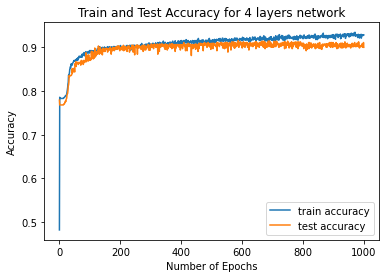

In [6]:
plt.plot(histories['4_layer'].history['accuracy'], label='train accuracy')
plt.plot(histories['4_layer'].history['val_accuracy'], label='test accuracy')

plt.title('Train and Test Accuracy for 4 layers network')
plt.ylabel('Accuracy')
plt.xlabel('Number of Epochs')
plt.legend(loc='lower right')
plt.savefig(f'./plots/parta/q5/5a_4layer_acc.png')
plt.show()

In [9]:
final_train_acc = str(histories['4_layer'].history['accuracy'][epochs-1])
final_test_acc = str(histories['4_layer'].history['val_accuracy'][epochs-1])

print(f'Final Training Accuracy: {final_train_acc}')
print(f'Final Test Accuracy: {final_test_acc}')

Final Training Accuracy: 0.9280914068222046
Final Test Accuracy: 0.8996865153312683


In [8]:
print('Final results from the last epoch')
acc = histories['4_layer'].history['accuracy'][epochs-1]
val_acc = histories['4_layer'].history['val_accuracy'][epochs-1]
loss = histories['4_layer'].history['loss'][epochs-1]
val_loss = histories['4_layer'].history['val_loss'][epochs-1]
    
print()
print(f'Accuracy\t\t: {acc}')
print(f'Validation Accuracy\t: {val_acc}')
print(f'Loss\t\t\t: {loss}')
print(f'Validation Loss\t\t: {val_loss}')

Final results from the last epoch

Accuracy		: 0.9280914068222046
Validation Accuracy	: 0.8996865153312683
Loss			: 0.1654464602470398
Validation Loss		: 0.2680414617061615
